1.Setup and Load Data

1.1 Install Dependencies and Setup

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "C:\Users\jhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\jhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\jhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^

In [3]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
anyio                     4.6.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.8.6
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.1.0
fastjsonschema            2.20.0
flatbuffers               24.3.25
fonttools                 4.54.1
fqdn                      1.5.1
gast          

In [14]:
import tensorflow as tf
import os

In [15]:
gpus = tf.config.experimental.list_physical_devices("CPU") 

In [16]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [17]:
#Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

1.2 Remove dodgy images

In [18]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\jhaga\AppData\Local\Temp\ipykernel_7516\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [19]:
data_dir='data'

In [20]:
os.listdir(data_dir)

['happy', 'sad']

In [21]:
os.listdir(os.path.join(data_dir,'happy'))

['360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'AF2bZyiNXmThkX9PIaFAbsa4HRruiaBFcC7qs8qlPeAiuLlw5ws64-c-mo.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'group-young-happy-people-with-their-hands-up_369728-62.jpg',
 'hand-drawn-happy-people-jumping_23-2149092878.jpg',
 'Happy-People-2.jpeg',
 'happypeople-1024x679.jpg',
 'image.jpeg',
 'image10.jpeg',
 'image11.jpeg',
 'image12.jpeg',
 'image13.jpeg',
 'image14.jpeg',
 'image15.jpeg',
 'image16.jpeg',
 'image17.jpeg',
 'image18.jpeg',
 'image19.jpeg',
 'image2.jpeg',
 'image20.png',
 'image3.jpeg',
 'image4.jpeg',
 'image5.jpeg',
 'image6.jpeg',
 'image7.jpeg',
 'image8.jpeg',
 'image9.jpeg',
 'mqdefault.jpg',
 'smiling-young-african-american-woman-260nw-2290057229.jpg',
 'sunset-570881_1280.jpg']

In [22]:
image_exts=['jpeg','jpg','bmp','png']

In [23]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [24]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        print(image_class)

happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad


In [25]:
img=cv2.imread(os.path.join('data','happy',"image4.jpeg"))

In [26]:
img.shape

(83, 148, 3)

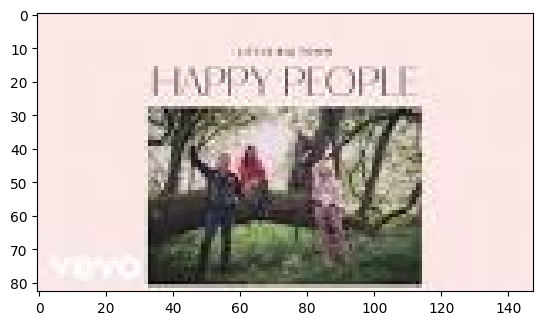

In [27]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in exit list{}',format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))
            #os.remove(image_path)

1.3 Load Data

In [29]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [30]:
import numpy as np
from matplotlib import pyplot as plt

In [31]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [32]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 159 files belonging to 2 classes.


In [33]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
data_iterator=data.as_numpy_iterator()

In [35]:

data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000020EADEE4590>)

In [36]:
#Get another batch from the iterator
batch=data_iterator.next()

In [37]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [38]:
#Class 1 = SAD PPL
#Class 2 = HAPPY PPL
batch[1]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

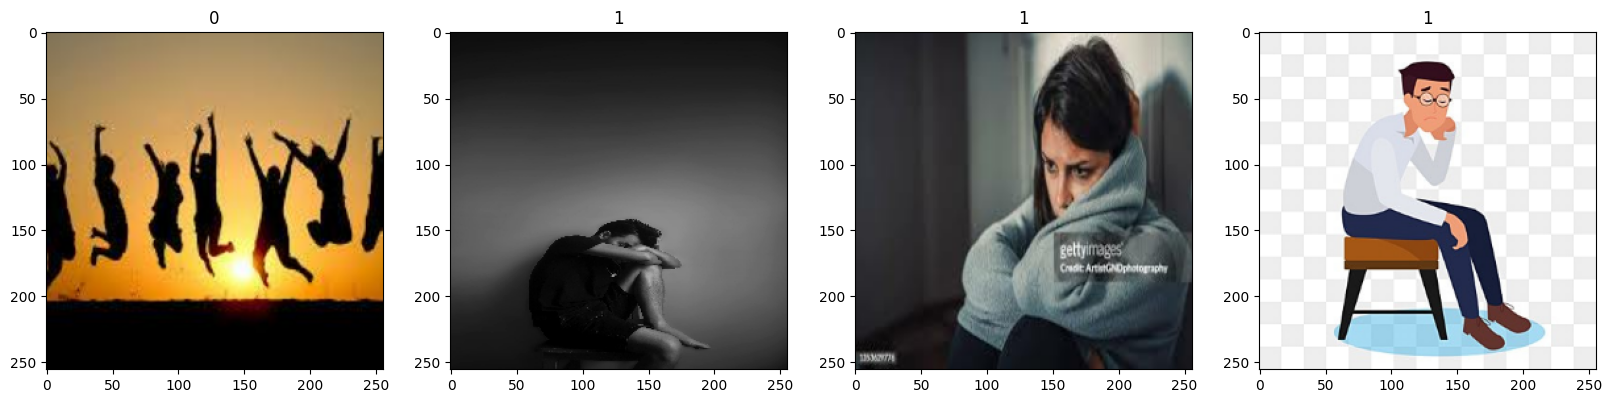

In [39]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

2.Preprocess Data

2.1 Scale Data

In [40]:
data=data.map(lambda x,y:(x/255,y))

In [43]:
data.as_numpy_iterator().next()[0].max()

1.0

In [44]:
scaled_iterator=data.as_numpy_iterator()

In [45]:
batch=scaled_iterator.next()

In [49]:
batch[0].max()

1.0

In [50]:
batch[0].min()

0.0

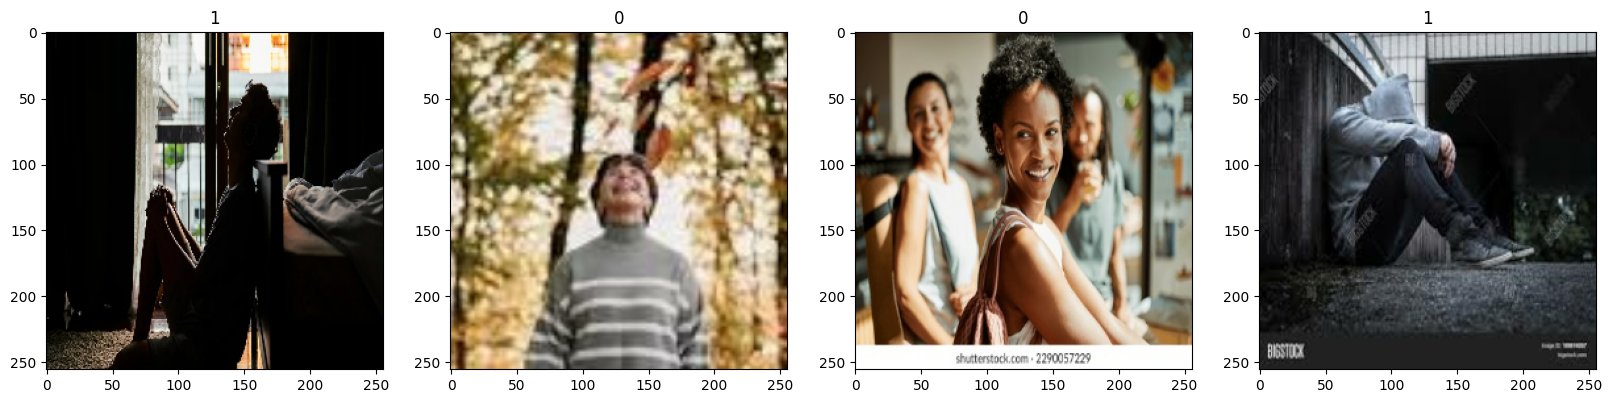

In [47]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [57]:
len(data)

5

In [61]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [62]:
train_size+val_size+test_size

5

In [63]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [64]:
len(test)

1

3. Deep Model

3.1 Build Deep Learning Model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [66]:
model=Sequential()

In [69]:
MaxPooling2D??

Init signature:
MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    name=None,
    **kwargs,
)
Source:        
@keras_export(["keras.layers.MaxPooling2D", "keras.layers.MaxPool2D"])
class MaxPooling2D(BasePooling):
    """Max pooling operation for 2D spatial data.

    Downsamples the input along its spatial dimensions (height and width)
    by taking the maximum value over an input window
    (of size defined by `pool_size`) for each channel of the input.
    The window is shifted by `strides` along each dimension.

    The resulting output when using the `"valid"` padding option has a spatial
    shape (number of rows or columns) of:
    `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
    (when `input_shape >= pool_size`)

    The resulting output shape when using the `"same"` padding option is:
    `output_shape = math.floor((input_shape - 1) / strides) + 1`

    Args:
        pool_size: int or tuple of 2 integers

In [68]:
#
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [70]:
model.compile('adam',loss=tf._losses.BinaryCrossentropy(),metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,193 (149.19 KB)

 Trainable params: 38,193 (149.19 KB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [72]:
logdir='logs'

In [73]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [74]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7865 - loss: 0.6721 - val_accuracy: 0.8125 - val_loss: 0.6008
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 867ms/step - accuracy: 0.7826 - loss: 0.5776 - val_accuracy: 0.7500 - val_loss: 0.6424
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 803ms/step - accuracy: 0.8529 - loss: 0.5142 - val_accuracy: 0.8125 - val_loss: 0.5605
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 801ms/step - accuracy: 0.7747 - loss: 0.5942 - val_accuracy: 0.7188 - val_loss: 0.6030
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 806ms/step - accuracy: 0.7839 - loss: 0.5409 - val_accuracy: 0.7812 - val_loss: 0.5881
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 888ms/step - accuracy: 0.7773 - loss: 0.5570 - val_accuracy: 0.7812 - val_loss: 0.5417
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7435 - loss: 0.5860 - val_accuracy: 0.9062 - val_loss: 0.4156
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 968ms/step - accuracy: 0.7721 - loss: 0.5326 - val_accuracy: 0.8438 - val_loss: 0.473

In [75]:
hist.history

{'accuracy': [0.7916666865348816,
  0.7916666865348816,
  0.8229166865348816,
  0.7604166865348816,
  0.8020833134651184,
  0.78125,
  0.7291666865348816,
  0.7708333134651184,
  0.7916666865348816,
  0.8020833134651184,
  0.7916666865348816,
  0.78125,
  0.78125,
  0.75,
  0.7916666865348816,
  0.8125,
  0.7708333134651184,
  0.7916666865348816,
  0.8125,
  0.8125],
 'loss': [0.664318859577179,
  0.5518614649772644,
  0.6029189229011536,
  0.6034784913063049,
  0.5378401875495911,
  0.5540018081665039,
  0.5976388454437256,
  0.540506899356842,
  0.5147021412849426,
  0.4851625859737396,
  0.49383869767189026,
  0.48556387424468994,
  0.4542511999607086,
  0.4692508280277252,
  0.37894997000694275,
  0.37712040543556213,
  0.4063446521759033,
  0.3718216121196747,
  0.29481783509254456,
  0.3645789623260498],
 'val_accuracy': [0.8125,
  0.75,
  0.8125,
  0.71875,
  0.78125,
  0.78125,
  0.90625,
  0.84375,
  0.84375,
  0.75,
  0.75,
  0.78125,
  0.78125,
  0.71875,
  0.78125,
  0.7187

3.3 Plot Performance

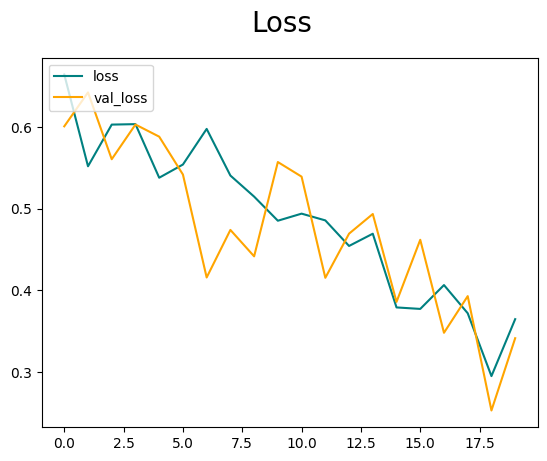

In [77]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

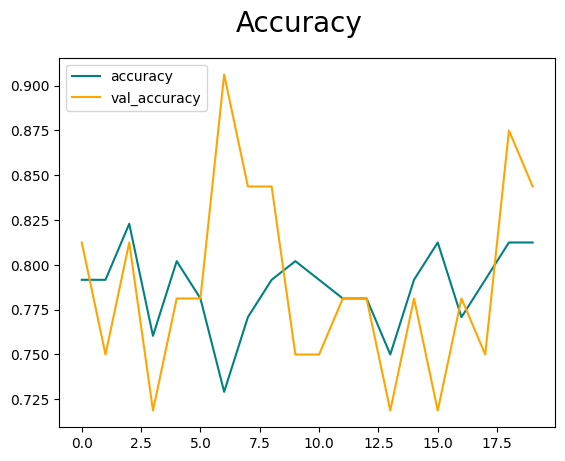

In [78]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

4. Evaluate Performance

4.1 Evalute

In [79]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [81]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [82]:
len(test)

1

In [89]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [90]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.725806474685669,Recall:1.0,Accuracy:0.725806474685669


4.2 Test

In [94]:
import cv2

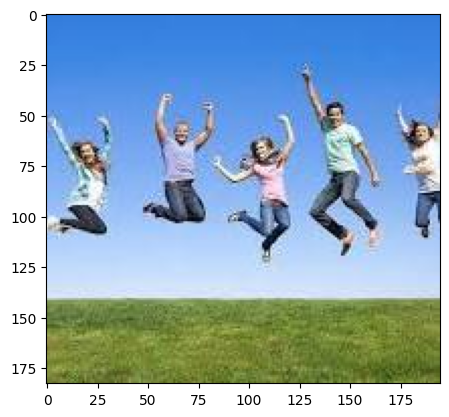

In [101]:
img=cv2.imread("image15.jpeg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

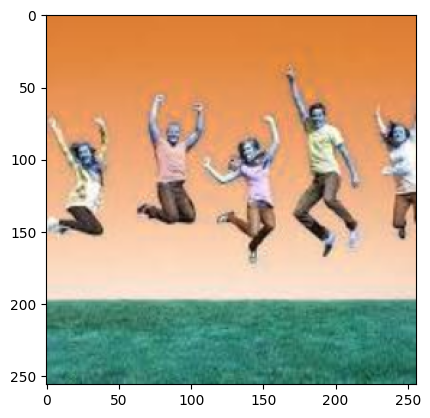

In [102]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [106]:
resize.shape

TensorShape([256, 256, 3])

In [107]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [108]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


In [109]:
yhat

array([[0.55698836]], dtype=float32)

In [111]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is Happy')

Predicted class is sad


5. Save the Model

5.1 save the model

In [113]:
from tensorflow.keras.models import load_model

In [114]:
model.save(os.path.join('models','images.h5'))

In [115]:
new_model=load_model(os.path.join('models','images.h5'))